In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import h5py
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# quadra_root = "../../data/ACDC/quadra/"
quadra_root = "."

In [4]:
quadra_data = h5py.File(os.path.join(quadra_root, "acdc.h5"), "r")
quadra_meta = pd.read_csv(os.path.join(quadra_root, "quadra_per_slice.csv"))

In [5]:
quadra_meta.iloc[0].H5path

'quadra_per_slice/0000'

In [6]:
df = quadra_meta
sample = df[
    (df['Group'] == 'DCM') & 
    (df['Patient'] == 'patient001') &
    (df['Phase'] == "ed")
]

Text(0.5, 0.98, 'patient001, ed, slice1~9')

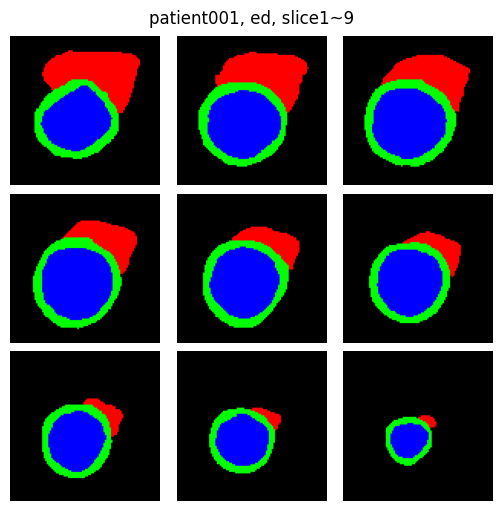

In [7]:
fig, axs = plt.subplots(3, 3, figsize=(5,5), constrained_layout=True)
axsf = axs.flatten()
for i in range(9):
    ax = axsf[i]
    h5path = sample.H5path[i+1]
    slice = quadra_data[h5path][:]
    ax.imshow(slice[..., 1:])
    ax.set_axis_off()
fig.suptitle(f"{sample.Patient[0]}, {sample.Phase[0]}, slice1~9")

In [8]:
sample = df[
    (df['Group'] == 'DCM') & 
    (df['Patient'] == 'patient001') &
    (df['Phase'] == "ed") &
    (df["SliceIdx"] == 1)
]
slice = quadra_data[sample.H5path.values[0]]

Text(0.5, 0.98, 'patient001, ed, slice 1')

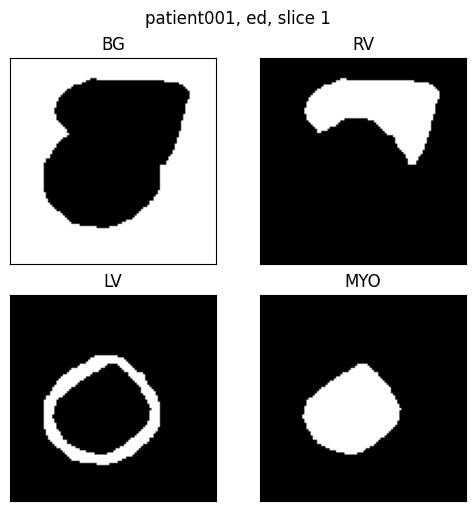

In [9]:
fig, axs = plt.subplots(2, 2, figsize=(5,5), constrained_layout=True)
axsf = axs.flatten()
labels = ["BG", "RV", "LV", "MYO"]
for i in range(4):
    ax = axsf[i]
    ax.imshow(slice[..., i], cmap="gray", vmin=0, vmax=1)
    ax.set_title(labels[i])
    ax.set_xticks([])
    ax.set_yticks([])
    
fig.suptitle(f"{sample.Patient.values[0]}, {sample.Phase.values[0]}, slice 1")

---
---